c:\users\omkar\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


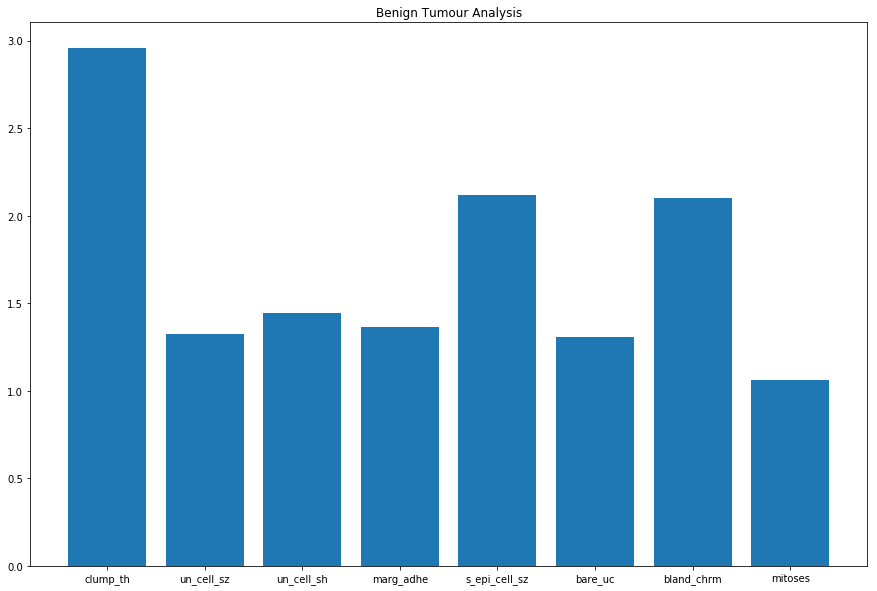

0    2.956332
1    1.325328
2    1.443231
3    1.364629
4    2.120087
5    1.305677
6    2.100437
7    2.100437
8    1.063319
Name: benign, dtype: float64


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns


names = ['scodeno','clump_th','un_cell_sz','un_cell_sh','marg_adhe','s_epi_cell_sz','bare_uc','bland_chrm','nor_nucl','mitoses','class']
df = pd.read_csv("C:\\Users\\Omkar\\Desktop\\bcw.data", names= names)

del df['scodeno']

for miss in df['bare_uc']:
    if miss=='?':
        i=df[df.bare_uc == miss].index
        df['bare_uc'][i]=0
        


df3 = df[['clump_th','un_cell_sz','un_cell_sh','marg_adhe','s_epi_cell_sz','bare_uc','bland_chrm','nor_nucl','mitoses']]

col =[]

for cl in df['class']:
    if cl==2:
        col.append('red')
    else:
        col.append('green')
h_list=[]


def calc(name):
    mlg=[]
    bgn=[]
    for i,j in zip(df[name],df['class']):
        if j==2:
            bgn.append(i)
        else:
            mlg.append(i)
    mlg_mean =np.mean(np.array(mlg).astype(np.float))
    bgn_mean = np.mean(np.array(bgn).astype(np.float))
    return [bgn_mean,mlg_mean]
    
    


names = ['clump_th','un_cell_sz','un_cell_sh','marg_adhe','s_epi_cell_sz','bare_uc','bland_chrm','bland_chrm','mitoses']
for n in names:
    h_list.append(calc(n))
hist_df = pd.DataFrame(h_list, columns=['benign','malignant'])
#print(hist_df)
plt.figure(figsize=(15,10))
plt.bar(names,hist_df['benign'])
plt.title('Benign Tumour Analysis')

plt.show()

print(hist_df['benign'])
#scatter_matrix(df3,alpha=0.3,figsize=(8,8),color = col, diagonal = 'hist')

    

